# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [142]:
# Code Here
!pip install palmerpenguins
import numpy as np
import pandas as pd
from sys import exit
from palmerpenguins import load_penguins
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [143]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

# Dummify categorical variables using pd.get dummies
penguins = pd.get_dummies(penguins, drop_first=True)

# Define predictors (X) and target (y)
X = penguins.drop("bill_depth_mm", axis=1)
y = penguins["bill_depth_mm"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



In [144]:
# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_train_pred_lin = lin_reg.predict(X_train)
y_test_pred_lin = lin_reg.predict(X_test)
train_error_lin = mean_squared_error(y_train, y_train_pred_lin)
test_error_lin = mean_squared_error(y_test, y_test_pred_lin)

#asked chatgpt syntax on how to create a dataframe for the values
dflinear = pd.DataFrame([{'model':'LinearRegression', "Flexibility":7, 'MSE_train': train_error_lin, 'MSE_test': test_error_lin}])
dflinear

,model,Flexibility,MSE_train,MSE_test
0,LinearRegression,7,0.601011,0.6124


In [145]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2 KNN Models using 3 and 4
k_values = [3, 4]
train_errors_knn = []
test_errors_knn = []

#asked chatgpt for help with the for loop
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_train_pred_knn = knn.predict(X_train_scaled)
    y_test_pred_knn = knn.predict(X_test_scaled)
    train_errors_knn.append(mean_squared_error(y_train, y_train_pred_knn))
    test_errors_knn.append(mean_squared_error(y_test, y_test_pred_knn))
# Create a DataFrame for k-NN results
df_knn = pd.DataFrame({
    'model': "KNN",
    'Flexibility': [k for k in k_values],
    'MSE_train': train_errors_knn,
    'MSE_test': test_errors_knn
})

print(df_knn)

  model  Flexibility  MSE_train  MSE_test
0   KNN            3   0.340357  0.629272
1   KNN            4   0.382889  0.630000


In [146]:
# restricting depth
tree = DecisionTreeRegressor(random_state=42, max_depth=5)
tree.fit(X_train, y_train)
#asked chatgpt for help with syntax
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

#mse
train_error_tree = mean_squared_error(y_train, y_train_pred_tree)
test_error_tree = mean_squared_error(y_test, y_test_pred_tree)


dftree = pd.DataFrame([{
    'model': 'DST',
    'Flexibility': 5,
    'MSE_train': train_error_tree,
    'MSE_test': test_error_tree
}])

print(dftree)


  model  Flexibility  MSE_train  MSE_test
0   DST            5   0.343155  0.848596


In [147]:
#combining dataframes to make a plot
df_total = pd.concat([dflinear, df_knn, dftree])
df_total


,model,Flexibility,MSE_train,MSE_test
0,LinearRegression,7,0.601011,0.612400
0,KNN,3,0.340357,0.629272
1,KNN,4,0.382889,0.630000
0,DST,5,0.343155,0.848596


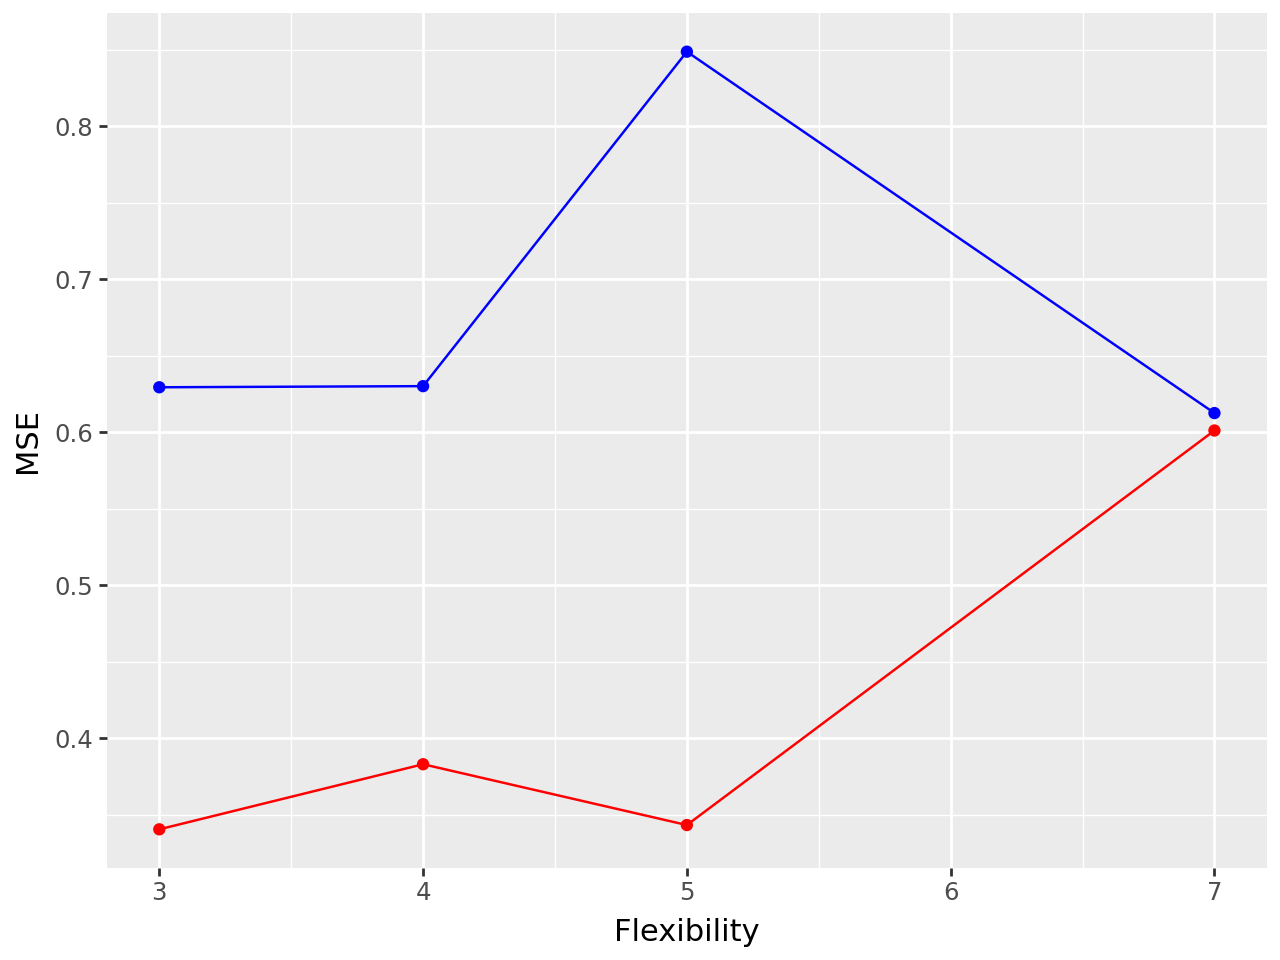

In [148]:
(ggplot(df_total, aes(x = "Flexibility")) +
  geom_line(aes(y = "MSE_train"),color="red") +
  geom_line(aes(y = "MSE_test"),color="blue") +
  geom_point(aes(y = "MSE_train"),color="red") +
  geom_point(aes(y = "MSE_test"),color="blue") +
  labs(x = "Flexibility", y = "MSE", color = "Score Type")
)



In [149]:
# model performing the best -- minimum test errors - chatgpt helped with syntax
best_model = models[test_errors.index(min(test_errors))]
print(f"The best model based on test error is: {best_model} based on smallest difference in MSE train and MSE test")

The best model based on test error is: Linear Regression based on smallest difference in MSE train and MSE test
